In [1]:
import sqlite3

import pandas as pd

import matplotlib.pyplot as plt

In [2]:
# Create a dummy SQLite database and table

conn = sqlite3.connect("sales_data.db")

cursor = conn.cursor()

In [3]:
# Create the sales table if it doesn't exist

cursor.execute("""

CREATE TABLE IF NOT EXISTS sales (

sale_id INTEGER PRIMARY KEY AUTOINCREMENT,

product TEXT NOT NULL,

quantity INTEGER NOT NULL,

price REAL NOT NULL

)

""")

In [4]:
# Insert some sample sales data

sales_data = [

('Laptop', 2, 1200.00),

('Mouse', 5, 25.00),

('Keyboard', 3, 75.00),

('Laptop', 1, 1150.50),

('Monitor', 4, 300.00),

('Mouse', 2, 22.75),

('Keyboard', 4, 80.00),

]

In [6]:
cursor.executemany("INSERT INTO sales (product, quantity, price) VALUES (?, ?, ?)", sales_data)


conn.commit()

In [7]:
# SQL query to get total quantity sold and total revenue per product

query = """

SELECT

product,

SUM(quantity) AS total_quantity_sold,

SUM(quantity * price) AS total_revenue

FROM

sales

GROUP BY

product;

"""

In [8]:
# Execute the SQL query and load the results into a pandas DataFrame

df = pd.read_sql_query(query, conn)


# Close the database connection

conn.close()

In [9]:
# Display the results using print statements

print("Basic Sales Summary:")

print("-" * 30)

print(df)

print("-" * 30)

print(f"Total Number of Products Sold: {df['total_quantity_sold'].sum()}")

print(f"Total Revenue: ${df['total_revenue'].sum():.2f}")

print("-" * 30)

Basic Sales Summary:
------------------------------
    product  total_quantity_sold  total_revenue
0  Keyboard                   14         1090.0
1    Laptop                    6         7101.0
2   Monitor                    8         2400.0
3     Mouse                   14          341.0
------------------------------
Total Number of Products Sold: 42
Total Revenue: $10932.00
------------------------------


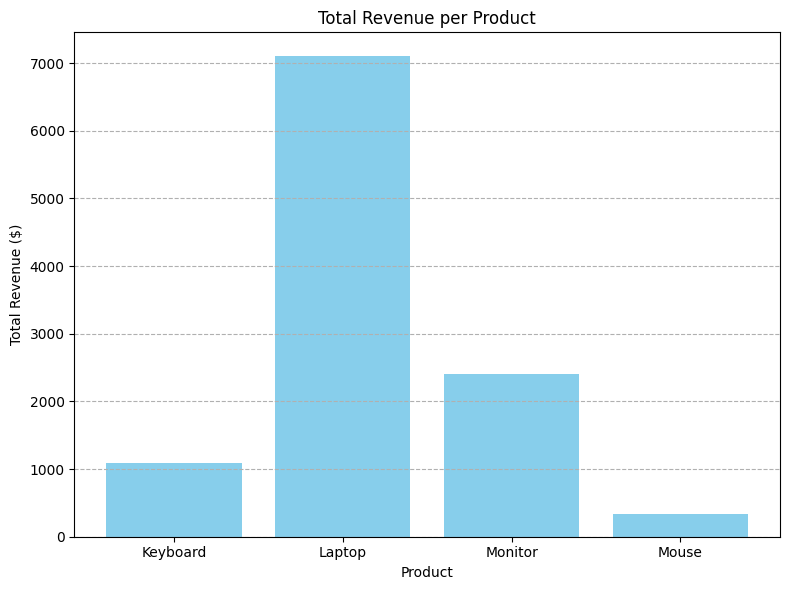

In [10]:
# Create a simple bar chart of revenue per product

plt.figure(figsize=(8, 6))

plt.bar(df['product'], df['total_revenue'], color='skyblue')

plt.xlabel("Product")

plt.ylabel("Total Revenue ($)")

plt.title("Total Revenue per Product")

plt.grid(axis='y', linestyle='--')

plt.tight_layout()

plt.show()

In [11]:
# If you want to save the chart:

# plt.savefig("sales_chart.png")


print("\nBar chart of revenue per product displayed (and optionally saved as sales_chart.png).")


Bar chart of revenue per product displayed (and optionally saved as sales_chart.png).
